In [1]:
#imports necessarios
import pandas as pd
import networkx as nx
from matplotlib.pyplot import figure
import numpy as np

In [2]:
#leitura csv
file = "data.csv"
df = pd.read_csv(file, delimiter=";")
df = df.set_index("switch")
df

,S0,S1,S2,S3
switch,,,,
S0,NaN,[3],[2],[1]
S1,[2],NaN,[1],0
S2,[1],[4],NaN,0
S3,[4],0,0,NaN


In [3]:
#Lidando com NaN e "0"
df = df.replace(np.nan,0)
df = df.replace("0",0)
df

,S0,S1,S2,S3
switch,,,,
S0,0,[3],[2],[1]
S1,[2],0,[1],0
S2,[1],[4],0,0
S3,[4],0,0,0


In [4]:
#verifica conexão dos nós
df1 = df != 0
df1 = df1.reset_index()
df1

,switch,S0,S1,S2,S3
0,S0,False,True,True,True
1,S1,True,False,True,False
2,S2,True,True,False,False
3,S3,True,False,False,False


In [5]:
#colunas: fonte e alvos
source = df1.iloc[:,1:].columns
targets = df1.iloc[:,2:].columns

In [6]:
source

Index(['S0', 'S1', 'S2', 'S3'], dtype='object')

In [7]:
targets

Index(['S1', 'S2', 'S3'], dtype='object')

In [8]:
#populando os nós
G = nx.from_pandas_edgelist(df1,source, targets, create_using=nx.Graph())

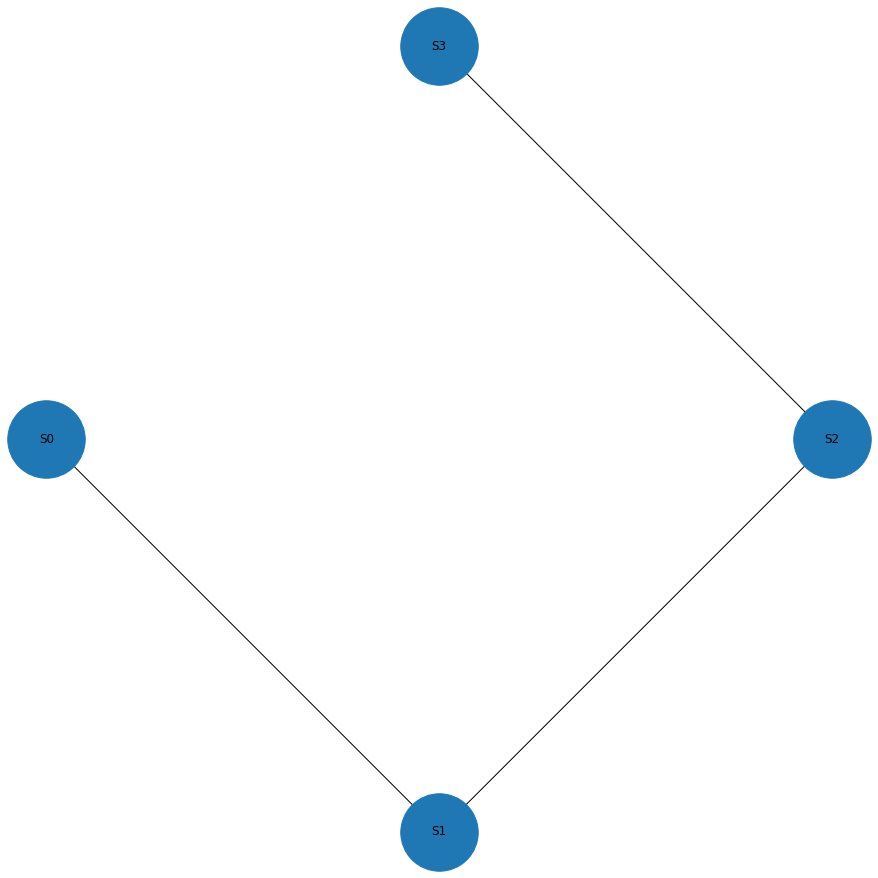

In [9]:
#grafo
figure(figsize=(12,12))
nx.draw_shell(G, with_labels=True, node_size=6000)
